# **eBay Auction Data**

In [28]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
!pip install dmba

In [30]:
from dmba import classificationSummary

In [31]:
#define random state
random_state=66

# **Step1: Data Preprocessing and Train Test Split**

In [32]:
ebay_auctions = pd.read_excel("ebayAuctions.xlsx",sheet_name=1)

In [33]:
ebay_auctions.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [34]:
missing_values = ebay_auctions.isnull().sum()
missing_values

,0
Category,0
Currency,0
sellerRating,0
Duration,0
endDay,0
ClosePrice,0
OpenPrice,0
Competitive?,0


In [35]:
#create dummy variables for the specified categorical columns
ebay_auctions_encoded = pd.get_dummies(ebay_auctions, columns=["Category", "Currency", "endDay", "Duration"], drop_first=False)

ebay_auctions_encoded.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3249,0.01,0.01,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3249,0.01,0.01,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3249,0.01,0.01,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,3249,0.01,0.01,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [36]:
#Here Is All the variables after dummy creation we have
ebay_auctions_encoded.columns.tolist()

['sellerRating',
 'ClosePrice',
 'OpenPrice',
 'Competitive?',
 'Category_Antique/Art/Craft',
 'Category_Automotive',
 'Category_Books',
 'Category_Business/Industrial',
 'Category_Clothing/Accessories',
 'Category_Coins/Stamps',
 'Category_Collectibles',
 'Category_Computer',
 'Category_Electronics',
 'Category_EverythingElse',
 'Category_Health/Beauty',
 'Category_Home/Garden',
 'Category_Jewelry',
 'Category_Music/Movie/Game',
 'Category_Photography',
 'Category_Pottery/Glass',
 'Category_SportingGoods',
 'Category_Toys/Hobbies',
 'Currency_EUR',
 'Currency_GBP',
 'Currency_US',
 'endDay_Fri',
 'endDay_Mon',
 'endDay_Sat',
 'endDay_Sun',
 'endDay_Thu',
 'endDay_Tue',
 'endDay_Wed',
 'Duration_1',
 'Duration_3',
 'Duration_5',
 'Duration_7',
 'Duration_10']

In [37]:
#Check if the target variable is in binary format
ebay_auctions_encoded['Competitive?'].unique()

array([0, 1])

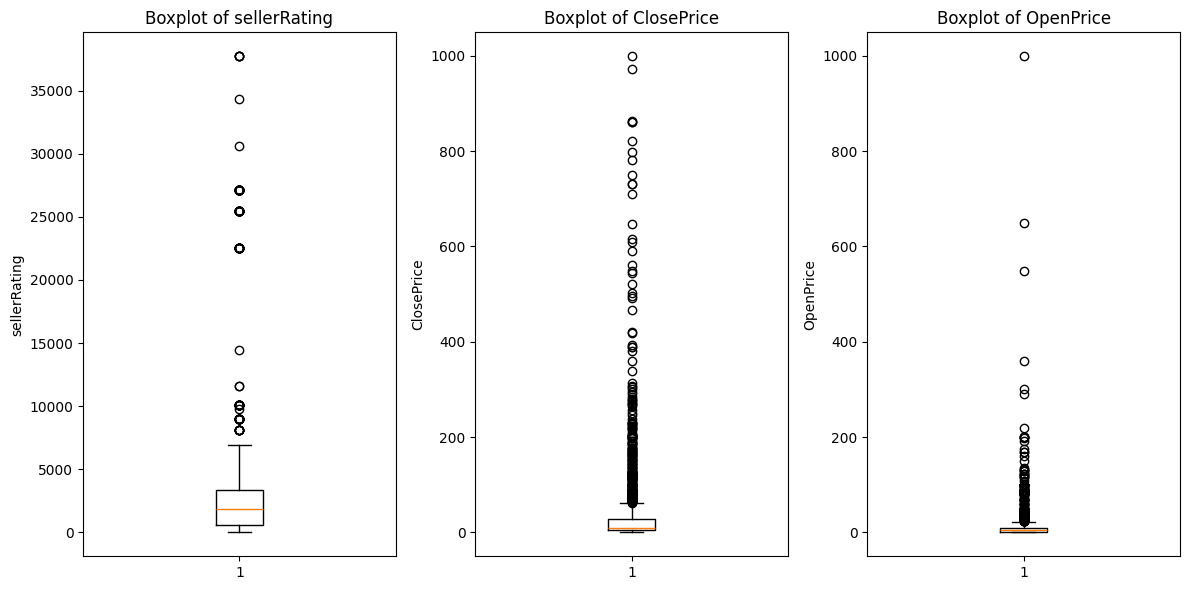

In [38]:
#Check for outliers
numerical_columns = ['sellerRating', 'ClosePrice', 'OpenPrice']
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(ebay_auctions_encoded[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Consider the decision tree can handle the outlier well and there is very few of them, I decide to leave them the way they are

In [39]:
#Split the Data into Training and Test Sets
X = ebay_auctions_encoded.drop(columns=['Competitive?'])
y = ebay_auctions_encoded['Competitive?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1183, 36), (789, 36), (1183,), (789,))

In [40]:
# Perform a final check on the training and test sets
# Checking for missing values, data types, and ensuring the target variable is binary in both sets

# Check for missing values in the training and test sets
missing_values_train = X_train.isnull().sum().sum()
missing_values_test = X_test.isnull().sum().sum()

# Check data types to ensure they are appropriate for modeling
data_types_train = X_train.dtypes
data_types_test = X_test.dtypes

# Check if target variable in training and test sets is binary (0 and 1)
target_values_train = y_train.unique()
target_values_test = y_test.unique()

missing_values_train, missing_values_test, data_types_train, data_types_test, target_values_train, target_values_test

(0,
 0,
 sellerRating                       int64
 ClosePrice                       float64
 OpenPrice                        float64
 Category_Antique/Art/Craft          bool
 Category_Automotive                 bool
 Category_Books                      bool
 Category_Business/Industrial        bool
 Category_Clothing/Accessories       bool
 Category_Coins/Stamps               bool
 Category_Collectibles               bool
 Category_Computer                   bool
 Category_Electronics                bool
 Category_EverythingElse             bool
 Category_Health/Beauty              bool
 Category_Home/Garden                bool
 Category_Jewelry                    bool
 Category_Music/Movie/Game           bool
 Category_Photography                bool
 Category_Pottery/Glass              bool
 Category_SportingGoods              bool
 Category_Toys/Hobbies               bool
 Currency_EUR                        bool
 Currency_GBP                        bool
 Currency_US              

# **Step2: First Classification Tree**

In [41]:
compTree = DecisionTreeClassifier(min_samples_leaf=50,random_state=random_state)
compTree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=66)

In [42]:
compTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 66,
 'splitter': 'best'}

In [43]:
compTree.tree_.max_depth

6

In [44]:
compTree.tree_.node_count

29

In [45]:
trainScore = compTree.score(X_train,y_train)*100
print("Training Score %.2f" %trainScore,'%')

Training Score 84.78 %


In [46]:
classificationSummary(y_train, compTree.predict(X_train))

Confusion Matrix (Accuracy 0.8478)

       Prediction
Actual   0   1
     0 451  58
     1 122 552


In [47]:
testScore = compTree.score(X_test,y_test)*100
print("Test Score %.2f" %testScore,'%')

Test Score 83.14 %


In [48]:
classificationSummary(y_test, compTree.predict(X_test))

Confusion Matrix (Accuracy 0.8314)

       Prediction
Actual   0   1
     0 343  54
     1  79 313


In [49]:
features_names = list(X_train.columns)

list_int = list(y_train.unique())
class_names = list(map(str, list_int))

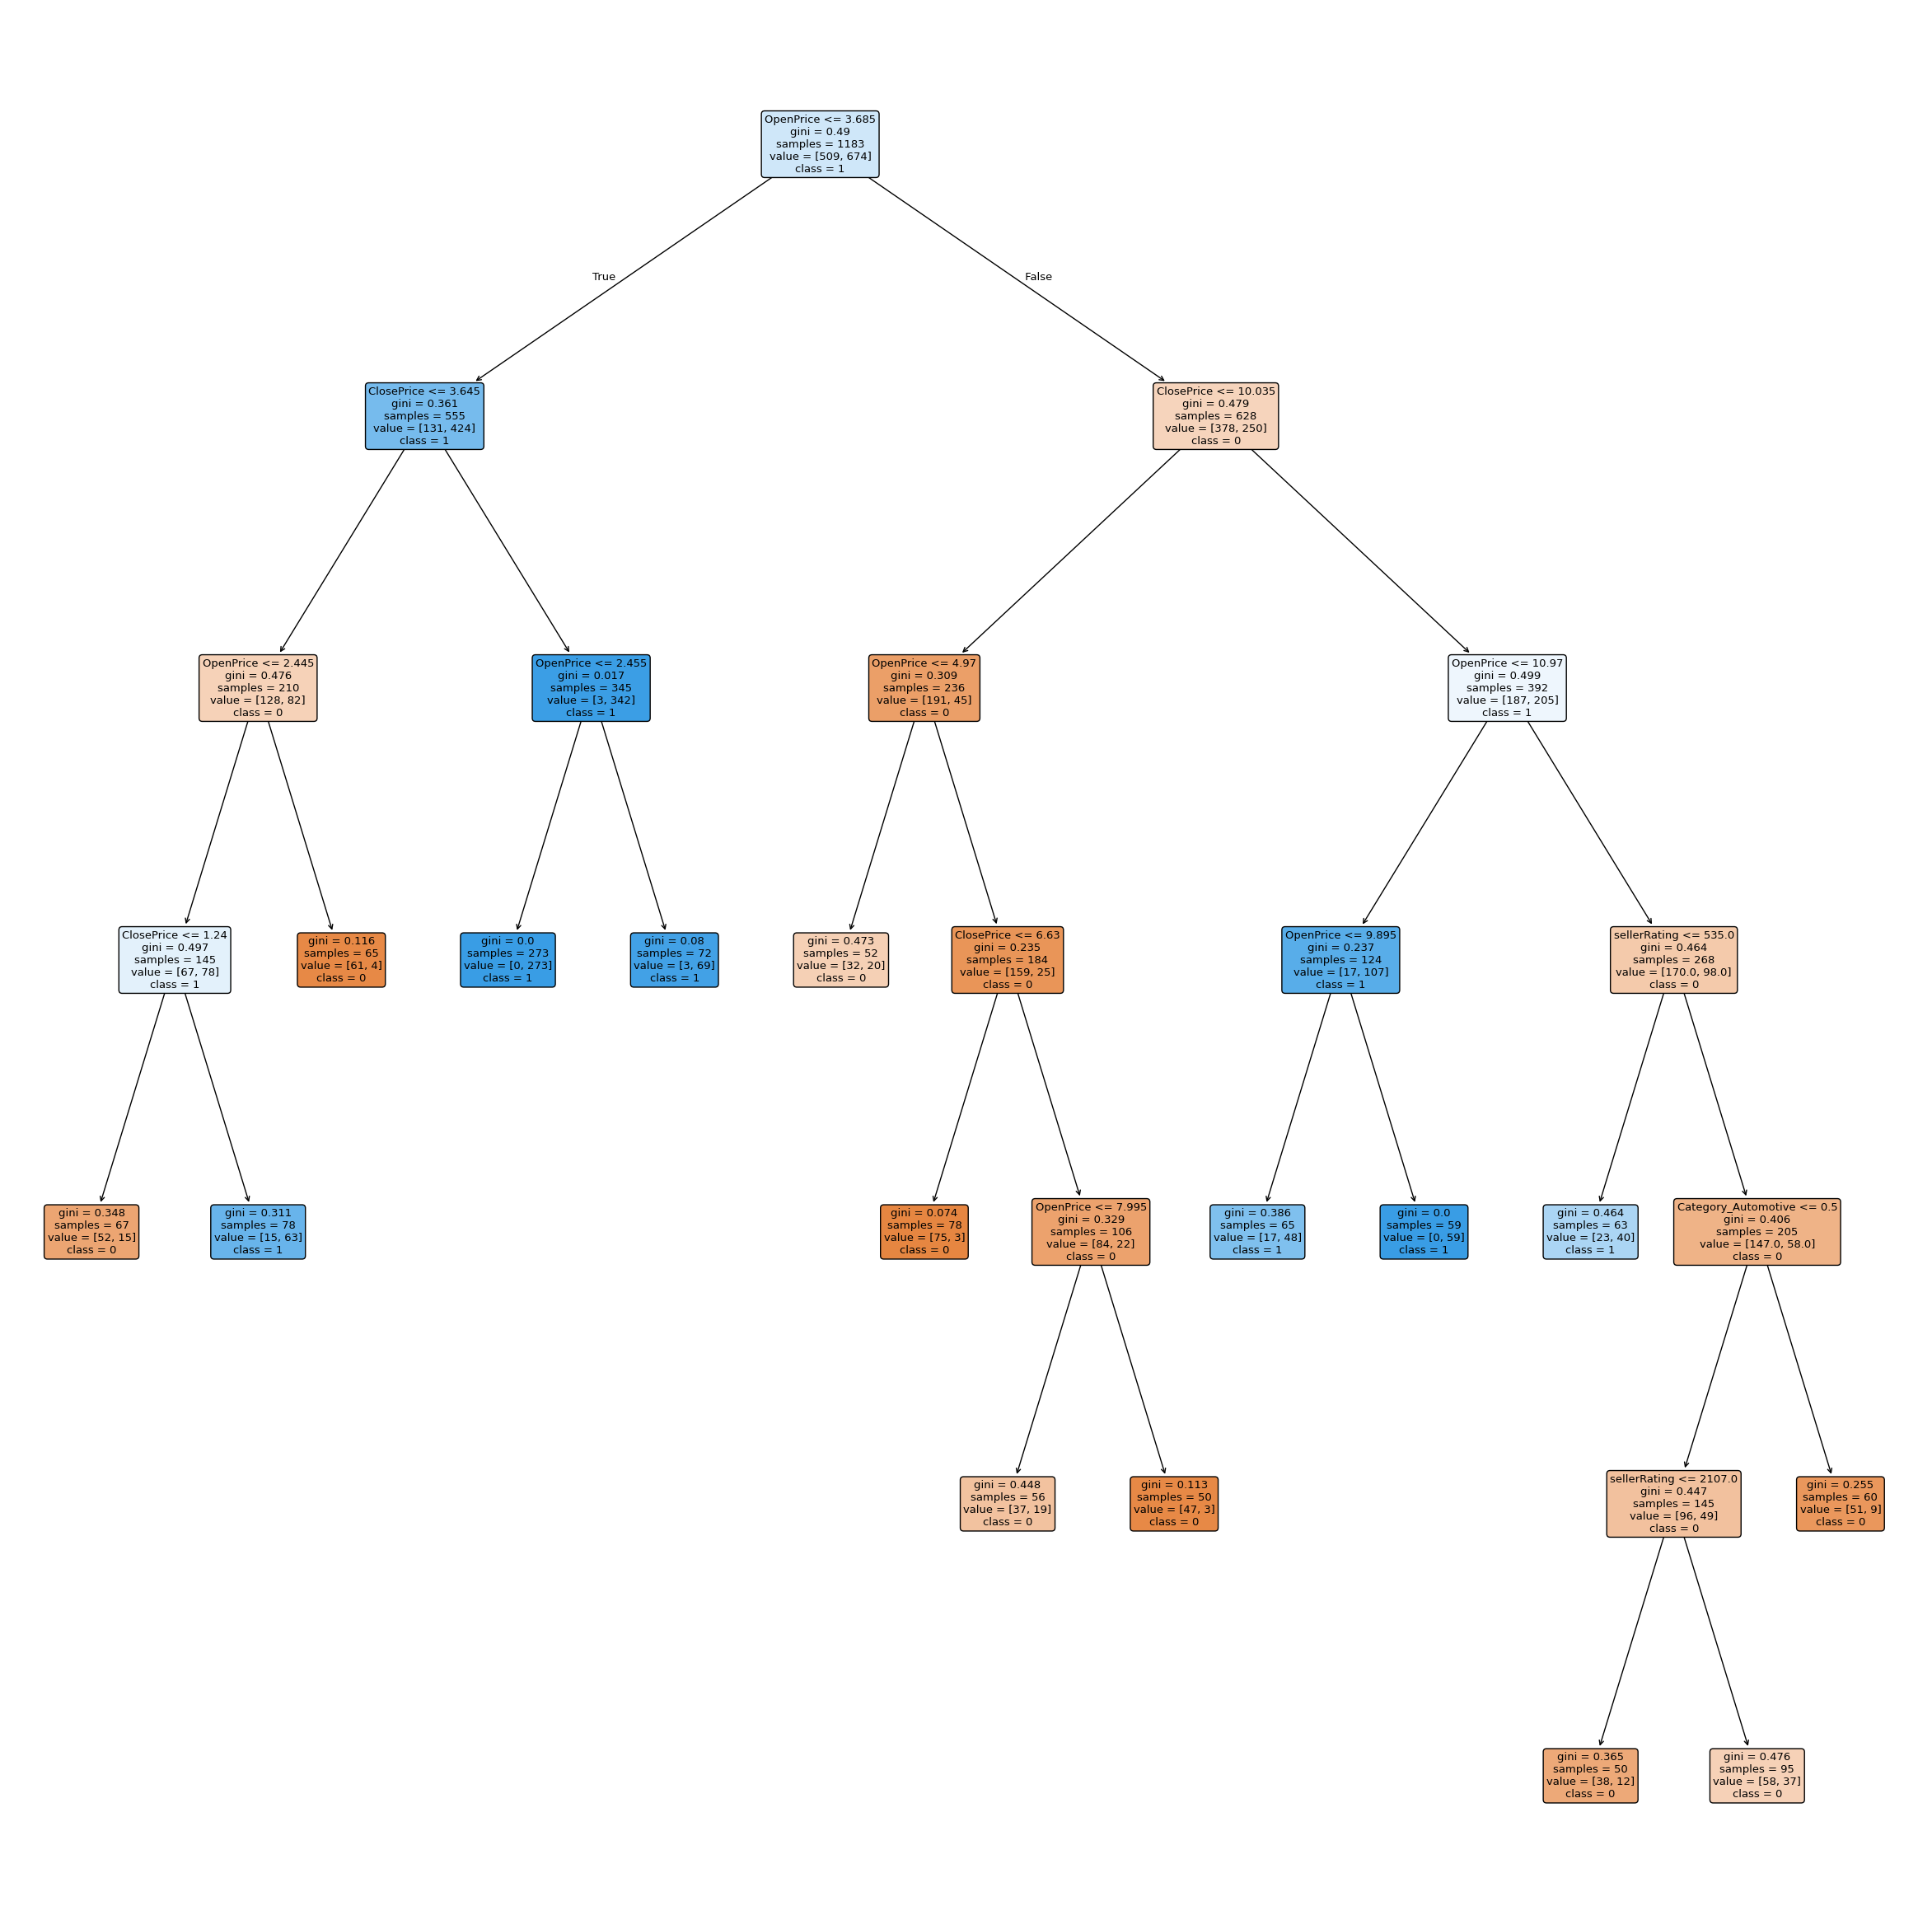

In [50]:
fig=plt.figure(figsize=(30,30))
tree.plot_tree(compTree, feature_names=features_names, class_names=class_names, rounded=True, filled=True)
fig.savefig("compTree.png")

In [51]:
text_representation = tree.export_text(compTree, feature_names=features_names)

In [52]:
with open('compTree.log','w') as fout:
    fout.write(text_representation)

In [53]:
# graphviz
dot_data = export_graphviz(compTree, out_file='compTree.dot',
                           feature_names=features_names,
                           class_names=class_names,
                           rounded=True,
                           filled=True)

# copy the text in dot file, and go to http://webgraphviz.com/ to generate tree graph

# **Step3: Variable Selection**

Drop closing price because we won't know the closing price when predicting whether the auction had a single bid or more.

In [54]:
X_train = X_train.drop(['ClosePrice'], axis=1)
X_train.head()

,sellerRating,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
524,5564,2.99,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1804,62,9.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1784,22501,30.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1158,109,1.23,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
118,3249,0.01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [55]:
X_test = X_test.drop(['ClosePrice'], axis=1)
X_test.head()

,sellerRating,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
425,2507,2.45,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1298,133,9.99,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1666,22501,20.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1047,2179,6.99,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
787,309,8.91,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


# **Step4: Second Classification Tree**

**Fit the new tree using GridSearch CV:**

In [56]:
param_grid = {'min_samples_leaf': [50],
              'min_impurity_decrease': [0.002,0.003,0.004,0.005],
              'min_samples_split': list(range(5, 10))}

In [57]:
GridSearch = GridSearchCV(DecisionTreeClassifier(random_state=random_state),
                          param_grid,
                          cv=5)
GridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=66),
             param_grid={'min_impurity_decrease': [0.002, 0.003, 0.004, 0.005],
                         'min_samples_leaf': [50],
                         'min_samples_split': [5, 6, 7, 8, 9]})

In [58]:
print('Initial Score: ', GridSearch.best_score_)
print('Initial Parameters: ', GridSearch.best_params_)

Initial Score:  0.7032789816205393
Initial Parameters:  {'min_impurity_decrease': 0.004, 'min_samples_leaf': 50, 'min_samples_split': 5}


In [59]:
newTree = GridSearch.best_estimator_
newTree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.004, min_samples_leaf=50,
                       min_samples_split=5, random_state=66)

In [60]:
newTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.004,
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 66,
 'splitter': 'best'}

In [61]:
newTree.tree_.max_depth

6

In [62]:
newTree.tree_.node_count

19

**Predictive Performance:**

In [63]:
classificationSummary(y_train, newTree.predict(X_train))

Confusion Matrix (Accuracy 0.7354)

       Prediction
Actual   0   1
     0 341 168
     1 145 529


In [64]:
classificationSummary(y_test, newTree.predict(X_test))

Confusion Matrix (Accuracy 0.7275)

       Prediction
Actual   0   1
     0 270 127
     1  88 304


**Plot the new tree as a tree diagram:**

In [65]:
features_names = list(X_train.columns)

list_int = list(y_train.unique())
class_names = list(map(str, list_int))

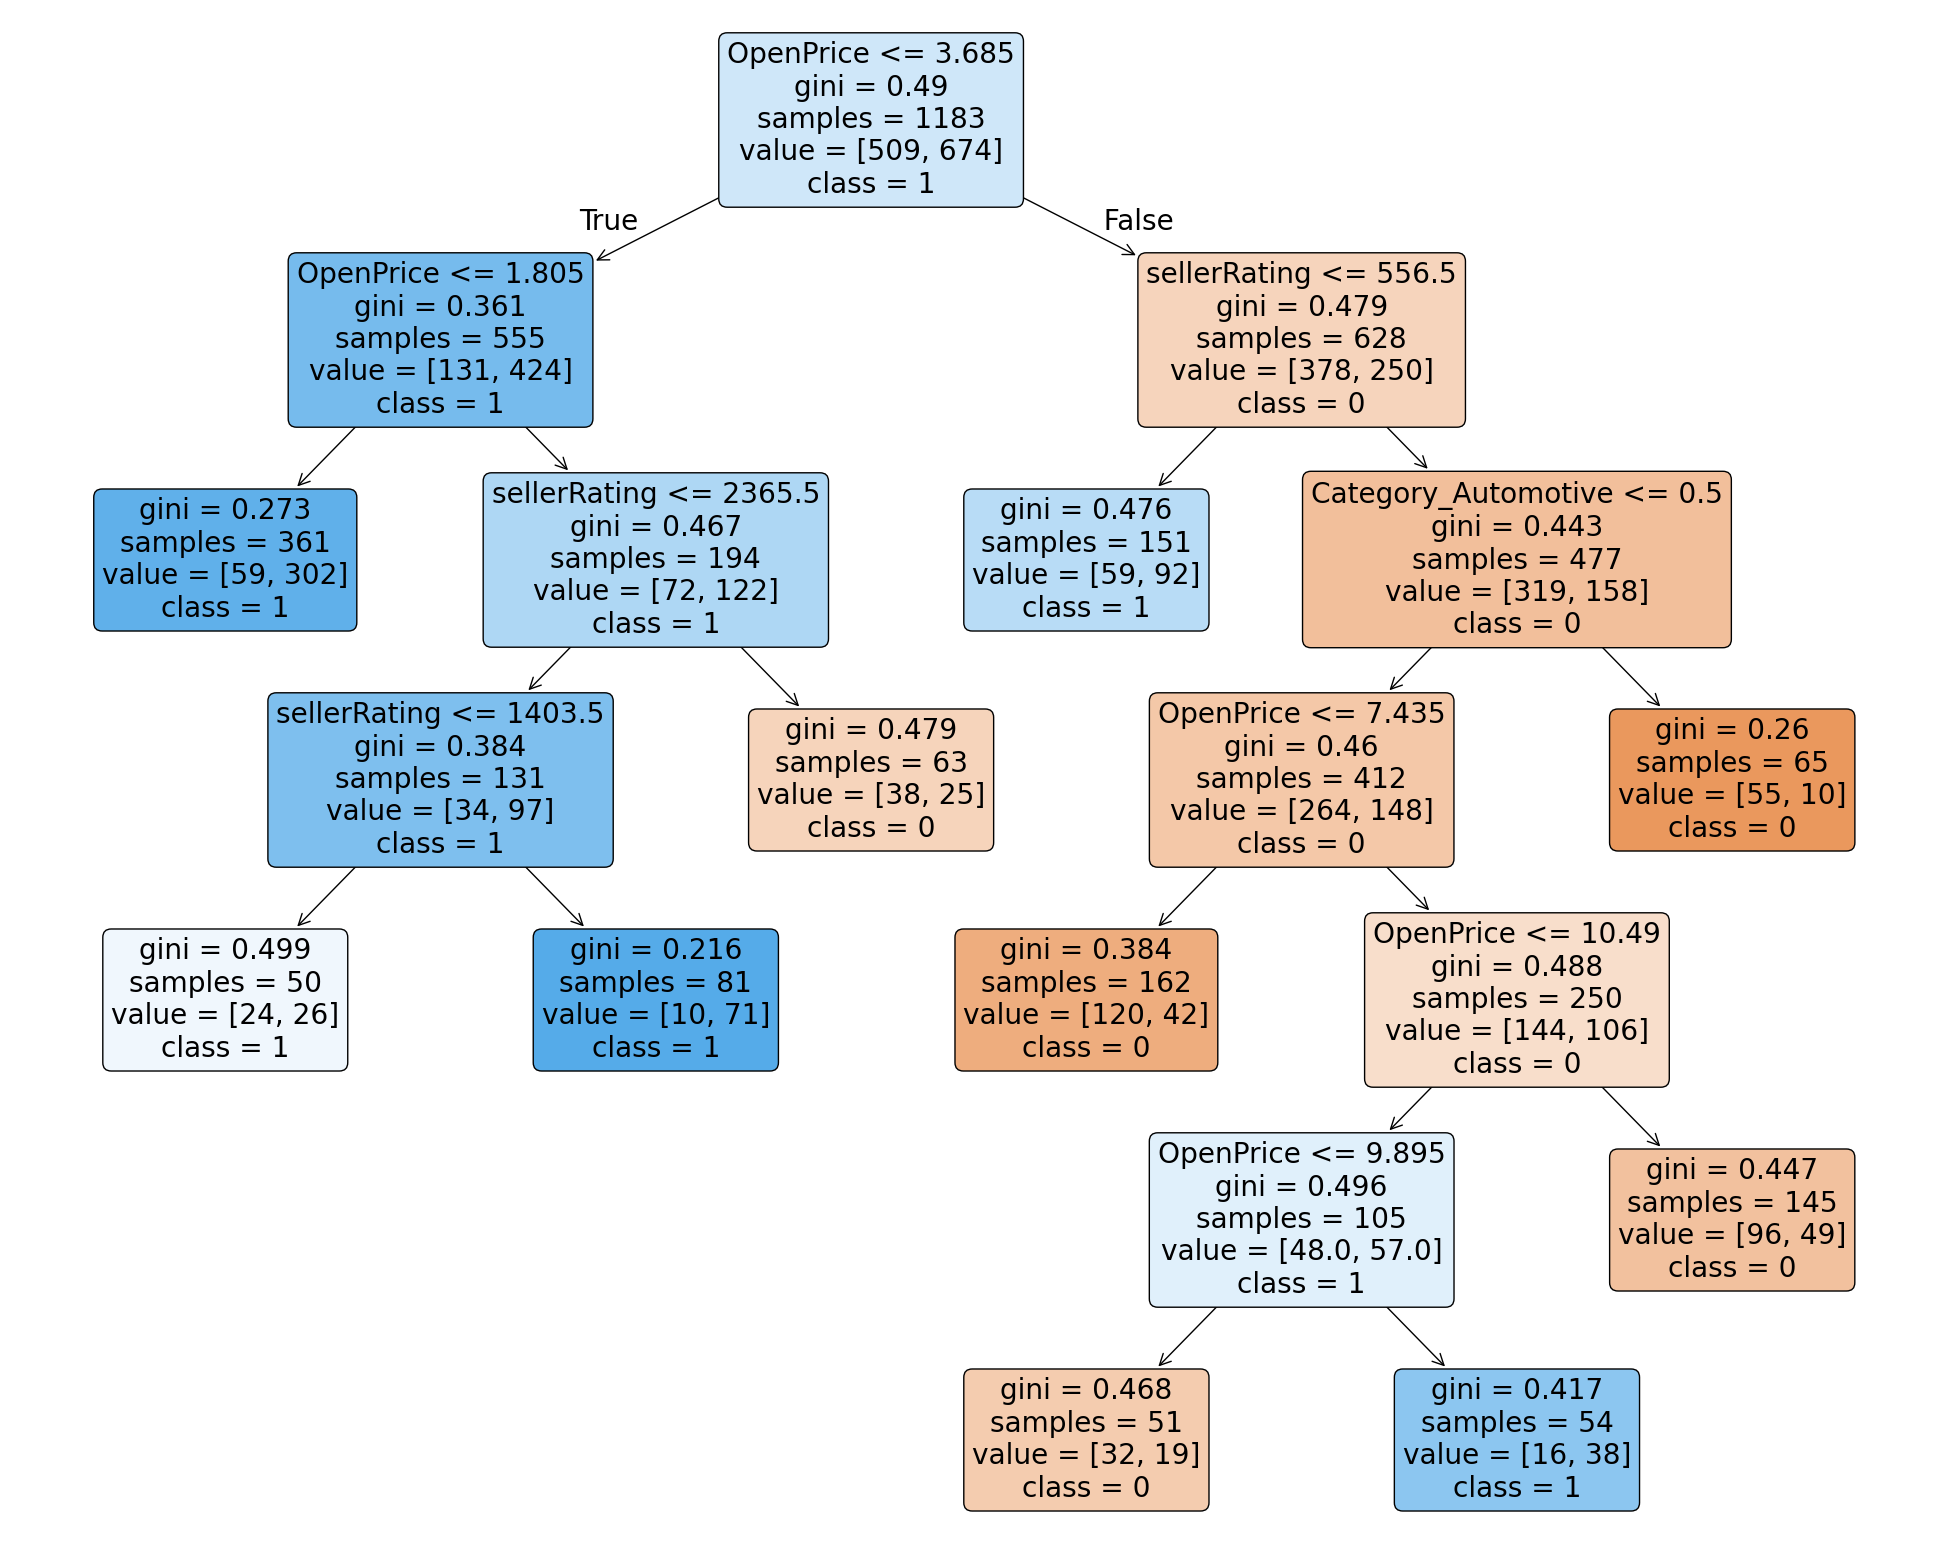

In [66]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(newTree, feature_names=features_names, class_names=class_names, rounded=True, filled=True)
fig.savefig("newTree.png")

In [67]:
# graphviz
dot_data = export_graphviz(newTree, out_file='newTree.dot',
                           feature_names=features_names,
                           class_names=class_names,
                           rounded=True,
                           filled=True)

# copy the text in dot file, and go to http://webgraphviz.com/ to generate tree graph

**Plot the new tree on a scatter plot:**

Two quantitative predictors: sellerRating and OpenPrice.

Text(3200, 15, 'Class = 0 (sellerRating > 556.5 and 10.49 < OpenPrice)')

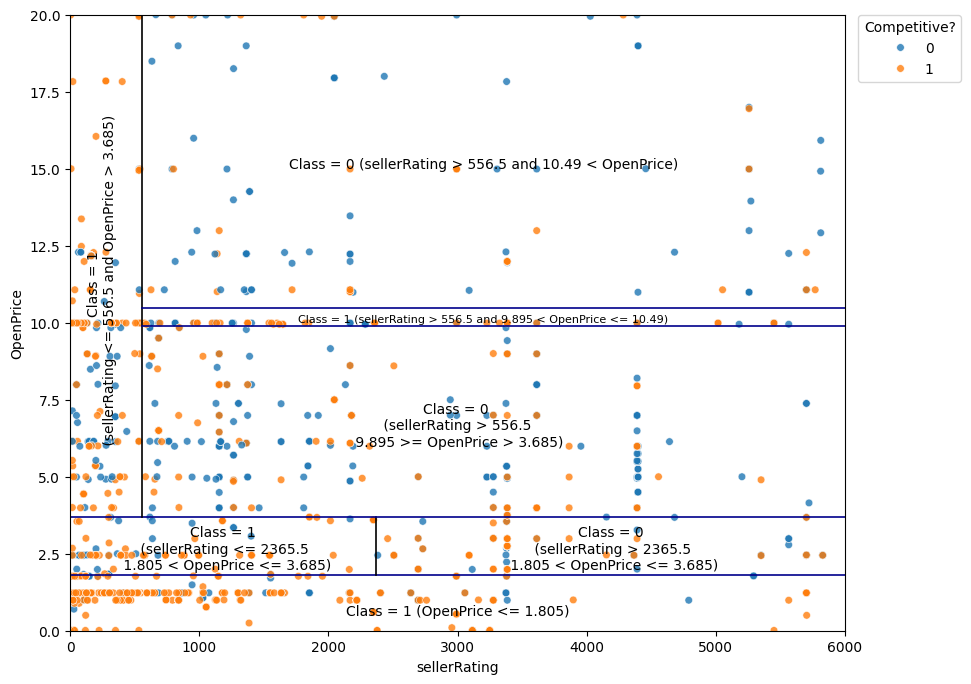

In [68]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="sellerRating", y="OpenPrice", hue="Competitive?",
                data=ebay_auctions_encoded, s=30,alpha= 0.8)
plt.xlim(0, 6000)
plt.ylim(0, 20)
plt.legend(title = 'Competitive?', bbox_to_anchor=(1.15, 1), loc='upper right', borderaxespad=0)

# rule 1
plt.plot([0, 6000], [1.805, 1.805], color="darkblue", linewidth=1.2)
plt.text(3000, 0.5, "Class = 1 (OpenPrice <= 1.805)", ha='center', fontsize=10)

# rule 2
plt.plot([2365.5, 2365.5], [1.805, 3.685], color="black", linewidth=1.2)
plt.text(4200, 2, "Class = 0 \n (sellerRating > 2365.5 \n 1.805 < OpenPrice <= 3.685)",
         ha='center', fontsize=10)
# rule 3
plt.text(1200, 2, "Class = 1 \n (sellerRating <= 2365.5 \n 1.805 < OpenPrice <= 3.685)",
         ha='center', fontsize=10)

# rule 4
plt.plot([0, 6000], [3.685, 3.685], color="darkblue", linewidth=1.2)
plt.plot([556.5, 556.5], [3.685, 20], color="black", linewidth=1.2)
plt.text(250, 6, "Class = 1 \n (sellerRating <= 556.5 and OpenPrice > 3.685)",
         ha='center', fontsize=10, rotation=90)


# rule 5
plt.plot([556.5, 6000], [9.895, 9.895], color="darkblue", linewidth=1.2)
plt.text(3000, 6, "Class = 0 \n (sellerRating > 556.5 \n 9.895 >= OpenPrice > 3.685)",
         ha='center', fontsize=10)


# rule 6
plt.plot([556.5, 6000], [10.49, 10.49], color="darkblue", linewidth=1.2)
plt.text(3200, 10, "Class = 1 (sellerRating > 556.5 and 9.895 < OpenPrice <= 10.49)",
         ha='center', fontsize=8)


# rule 7
plt.text(3200, 15, "Class = 0 (sellerRating > 556.5 and 10.49 < OpenPrice)",
         ha='center', fontsize=10)

In [69]:
# rule 1
filtered = (ebay_auctions_encoded['OpenPrice'] <= 1.805)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence1 = class_counts[1] / (class_counts[0] + class_counts[1]) * 100

# rule 2
filtered = (1.805 < ebay_auctions_encoded['OpenPrice']) & (ebay_auctions_encoded['OpenPrice'] <= 3.685) & (ebay_auctions_encoded['sellerRating'] <= 2365.5)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence2 = class_counts[1] / (class_counts[0] + class_counts[1]) * 100


# rule 3
filtered = (1.805 < ebay_auctions_encoded['OpenPrice']) & (ebay_auctions_encoded['OpenPrice'] <= 3.685) & (ebay_auctions_encoded['sellerRating'] > 2365.5)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence3 = class_counts[0] / (class_counts[0] + class_counts[1]) * 100


# rule 4
filtered = (ebay_auctions_encoded['OpenPrice'] > 3.685) & (ebay_auctions_encoded['sellerRating'] <= 556.5)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence4 = class_counts[1] / (class_counts[0] + class_counts[1]) * 100


# rule 5
filtered = (3.685 < ebay_auctions_encoded['OpenPrice']) & (ebay_auctions_encoded['OpenPrice'] <= 9.895) & (ebay_auctions_encoded['sellerRating'] > 556.5)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence5 = class_counts[0] / (class_counts[0] + class_counts[1]) * 100

# rule 6
filtered = (9.895 < ebay_auctions_encoded['OpenPrice']) & (ebay_auctions_encoded['OpenPrice'] <= 10.49) & (ebay_auctions_encoded['sellerRating'] > 556.5)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence6 = class_counts[1] / (class_counts[0] + class_counts[1]) * 100


# rule 7
filtered = (10.49 < ebay_auctions_encoded['OpenPrice']) & (ebay_auctions_encoded['sellerRating'] > 556.5)
filtered_data = ebay_auctions_encoded[filtered]
class_counts = filtered_data['Competitive?'].value_counts()
confidence7 = class_counts[0] / (class_counts[0] + class_counts[1]) * 100


print("Rule 1 Confidence: %.2f" %confidence1,'%')
print("Rule 2 Confidence: %.2f" %confidence2,'%')
print("Rule 3 Confidence: %.2f" %confidence3,'%')
print("Rule 4 Confidence: %.2f" %confidence4,'%')
print("Rule 5 Confidence: %.2f" %confidence5,'%')
print("Rule 6 Confidence: %.2f" %confidence6,'%')
print("Rule 7 Confidence: %.2f" %confidence7,'%')

Rule 1 Confidence: 81.03 %
Rule 2 Confidence: 70.42 %
Rule 3 Confidence: 63.06 %
Rule 4 Confidence: 63.90 %
Rule 5 Confidence: 74.25 %
Rule 6 Confidence: 60.64 %
Rule 7 Confidence: 73.54 %
